In [5]:
import numpy as np
from soccer import soccer_game
from qlearner import QLearner
from friendq import FriendQ
from foeq import FoeQ
from ceq import ceQ
from training import learning, plot_error

### Q-Learning

In [6]:
env = soccer_game()
learner_q = QLearner(env.nS, env.nA)

hist_q = learning(learner_q, env, epsilon_decay=0.999, alpha_decay=0.999, max_episode=20000)

100%|██████████| 20000/20000 [00:05<00:00, 3762.09it/s]


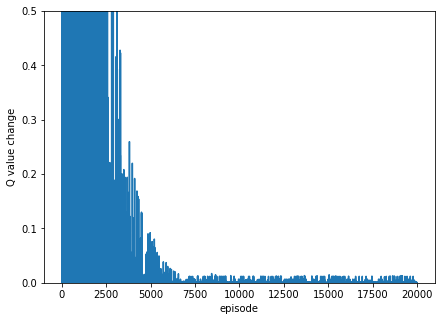

In [7]:
plot_error(hist_q, "figures/Q-2.png")

### Friend-Q

In [5]:
env = soccer_game()
learner_friendQ = FriendQ(env.nS, env.nA)

hist_friendQ = learning(learner_friendQ, env, epsilon_decay=0.999, alpha_decay=0.999, max_episode=20000)

100%|██████████| 20000/20000 [00:02<00:00, 7068.86it/s] 


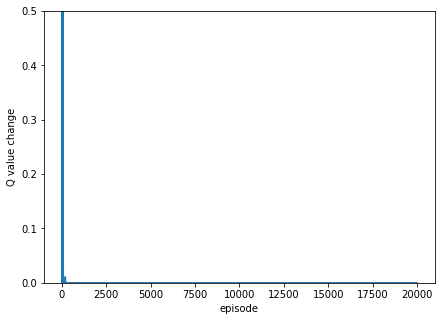

In [6]:
plot_error(hist_friendQ, "figures/friendQ-2.png")

In [7]:
# Q table for state 71
learner_friendQ.agents[0].Q[71].round(), learner_friendQ.agents[1].Q[71].round()

(array([[ 9., 10.,  8.,  9.,  9.],
        [ 9., 10.,  9.,  9.,  9.],
        [ 9., 10., -1.,  9.,  9.],
        [ 9., 10.,  8.,  9.,  9.],
        [ 9., 10.,  8.,  9.,  9.]]),
 array([[  9., -10.,   9.,   9.,   8.],
        [  9., -10.,   9.,   9.,   8.],
        [  8., -10.,   9.,   8.,   8.],
        [  9., -10.,   9.,   9.,   8.],
        [  8., -10.,   9.,   8.,   9.]]))

In [8]:
# Player 2's action
learner_friendQ.agents[1].select_action(71)

2

### Foe-Q

In [9]:
env = soccer_game()
learner_foeQ = FoeQ(env.nS, env.nA)

hist_foeQ = learning(learner_foeQ, env, epsilon_decay=0.999, alpha_decay=0.999, max_episode=20000)

100%|██████████| 20000/20000 [01:14<00:00, 267.81it/s]


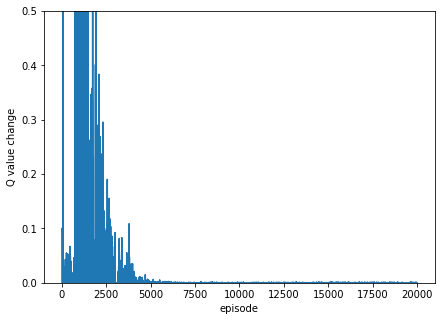

In [10]:
plot_error(hist_foeQ, "figures/foeQ-2.png")

In [11]:
# Q value for state(71)
learner_foeQ.agent1.Q[71].round(2), learner_foeQ.agent2.Q[71].round(2)

(array([[-1.7 , -2.07, -1.94, -1.99, -1.74],
        [10.  , 10.  , 10.  , 10.  , 10.  ],
        [ 2.68,  0.27, -8.75,  2.7 , -2.08],
        [-2.45, -2.17, -2.29, -2.38, -3.03],
        [-3.22, -4.61, -4.08, -2.83, -2.34]]),
 array([[  1.7 , -10.  ,  -2.68,   2.45,   3.22],
        [  2.07, -10.  ,  -0.27,   2.17,   4.61],
        [  1.94, -10.  ,   8.75,   2.29,   4.08],
        [  1.99, -10.  ,  -2.7 ,   2.38,   2.83],
        [  1.74, -10.  ,   2.08,   3.03,   2.34]]))

In [12]:
# Policy -- probablity distribution
# stick left right up down
learner_foeQ.agent1.p[71].round(3),  learner_foeQ.agent2.p[71].round(3)

(array([0.   , 0.   , 0.   , 0.602, 0.398]),
 array([0.   , 0.   , 0.   , 0.429, 0.571]))

### Correlated Q

In [17]:
env = soccer_game()
learner_ceQ = ceQ(env.nS, env.nA)

hist_ceQ = learning(learner_ceQ, env, epsilon_decay=1, alpha_decay=0.999, max_episode=10000)

100%|██████████| 10000/10000 [04:01<00:00, 41.35it/s]


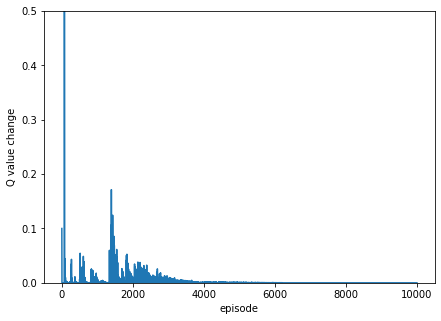

In [18]:
plot_error(hist_ceQ, "figures/ceQ-2.png")

In [19]:
# Q value for state(71)
learner_ceQ.agents[0].Q[71].round(2), learner_ceQ.agents[1].Q[71].round(2)

(array([[-1.37, 10.  ,  0.69, -1.38, -4.21],
        [-1.38, 10.  , -0.37, -1.38, -2.65],
        [-3.83, 10.  , -8.94, -3.85, -5.79],
        [-1.37, 10.  ,  0.69, -1.37, -4.21],
        [-1.73, 10.  , -3.32, -1.73,  0.04]]),
 array([[  1.37, -10.  ,  -0.69,   1.38,   4.21],
        [  1.38, -10.  ,   0.37,   1.38,   2.65],
        [  3.83, -10.  ,   8.94,   3.85,   5.79],
        [  1.37, -10.  ,  -0.69,   1.37,   4.21],
        [  1.73, -10.  ,   3.32,   1.73,  -0.04]]))

In [20]:
# Policy -- probablity distribution
# stick left right up down
p = learner_ceQ.p[71].reshape(5,5)
p.sum(axis=1).round(3), p.sum(axis=0).round(3) #for each agent i's marginal probabiliby, we should sum up all axis!=i

(array([0.   , 0.596, 0.   , 0.   , 0.404]),
 array([0.   , 0.   , 0.478, 0.   , 0.522]))

### Compare Foe-Q and Correlated-Q Q values

* difference between Q values

In [17]:
np.round(learner_ceQ.agents[0].Q[71]-learner_foeQ.agent1.Q[71].T, 5)

array([[ 0.34522, -0.     , -0.41065,  0.10033,  0.13426],
       [ 0.46356, -0.     , -0.95666, -0.01732,  0.25292],
       [-0.12949,  0.     , -0.48235, -0.37104,  1.9493 ],
       [ 0.30479,  0.     , -0.56535,  0.39861, -1.59177],
       [-0.52222,  0.     , -0.66034,  0.03958, -0.20671]])

* Given a same Q table, foe-Q and ce-Q should give the same solution

In [18]:
Q = np.array([[-25., -26., -29., -26., -36.],
              [100., 100., 100., 100., 100.],
              [ 10.,  -7., -91.,  10., -33.],
              [-28., -28., -28., -27., -37.],
              [-39., -38., -65., -39., -24.]])
learner_foeQ.agent1.Q[71] = Q
learner_foeQ.agent2.Q[71] = -Q.T

In [19]:
learner_foeQ.agent1.minmax(71)
print("p1", learner_foeQ.agent1.p[71].round(3), "V1", learner_foeQ.agent1.V[71])
learner_foeQ.agent2.minmax(71)
print("p1", learner_foeQ.agent2.p[71].round(3), "V1", learner_foeQ.agent2.V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.800000000000004
p1 [0.  0.  0.  0.6 0.4] V1 31.8


In [20]:
learner_ceQ.agents[0].Q[71] = Q.T
learner_ceQ.agents[1].Q[71] = -Q.T

learner_ceQ.solve(71)
p = learner_ceQ.p[71].reshape(5,5)
print("p1", p.sum(axis=1).round(3), "V1", learner_ceQ.agents[0].V[71])
print("p2", p.sum(axis=0).round(2), "V2", learner_ceQ.agents[1].V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.799999894036688
p2 [0.  0.  0.  0.6 0.4] V2 31.799999894036688
